In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.datasets import load_breast_cancer, load_iris

## Data Loading

In [5]:
data = load_breast_cancer()

In [7]:
xData = data['data']
yData = data["target"]

In [9]:
xData.shape

(569, 30)

In [11]:
yData.shape

(569,)

## Train Test Spliting

In [12]:
from sklearn.model_selection import train_test_split

In [31]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, train_size=0.8, shuffle=True, random_state=42)

In [14]:
xTrain.shape

(455, 30)

In [15]:
xTest.shape

(114, 30)

# Preprocessing
## normalization

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

## Model Training and Evaluation

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [36]:
model = DecisionTreeClassifier()
model.fit(xTrain, yTrain)
# prediction:
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [37]:
model = LogisticRegression()
model.fit(xTrain, yTrain)
# prediction:
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Principal Component Analysis

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [45]:
pca = PCA()
pca.fit(xTrain)
x_train_pca = pca.transform(xTrain)

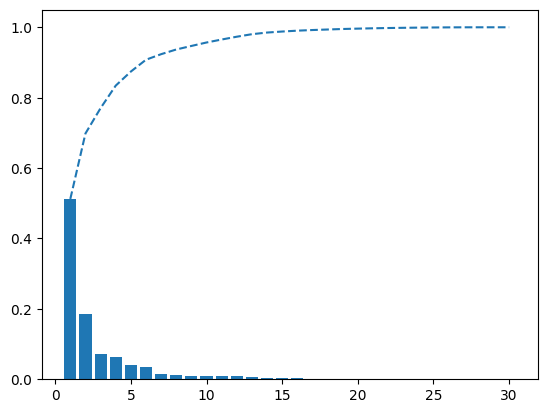

In [63]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), linestyle="--")

In [70]:
pca = PCA(n_components=6)
pca.fit(xTrain)
x_train_pca = pca.transform(xTrain)

In [71]:
x_train_pca.shape

(455, 6)

In [72]:
x_test_pca = pca.transform(xTest)

In [73]:
model = DecisionTreeClassifier()
model.fit(x_train_pca, yTrain)
# prediction:
y_pred = model.predict(x_test_pca)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [75]:
model = LogisticRegression()
model.fit(x_train_pca, yTrain)
# prediction:
y_pred = model.predict(x_test_pca)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [76]:
import seaborn as sns

<Axes: >

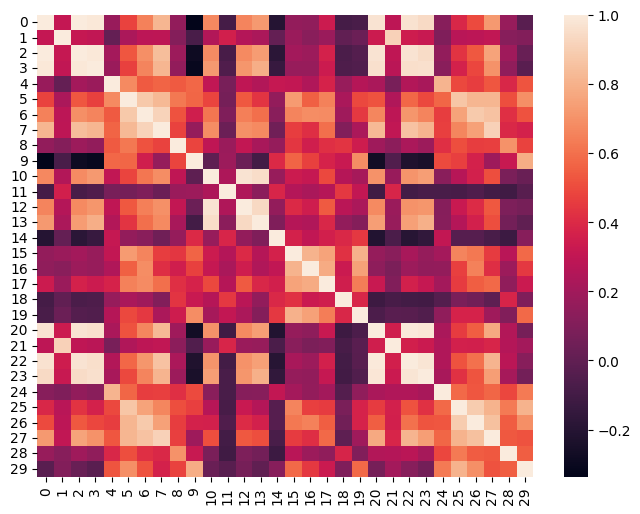

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(xTrain).corr())

<Axes: >

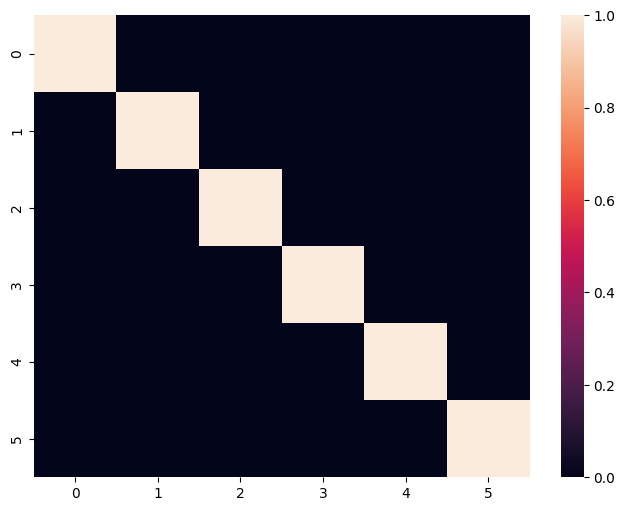

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(x_train_pca).corr())

<Axes: >

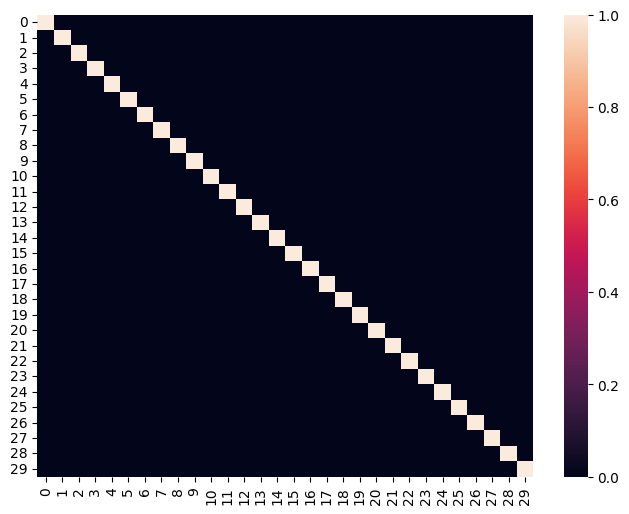

In [87]:
pca = PCA()
pca.fit(xTrain)
x_train_pca = pca.transform(xTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(x_train_pca).corr())